In [2]:
import nb_utils

Moving cwd to /store/CIA/js2164/repos/diffusion/src


In [3]:
# examine FFHQ data
import pickle
from lightning_data_modules.guided_diff_datasets import ImageDataModule
from configs.utils import fix_config
# load config
path = '/store/CIA/js2164/rds/gb511/projects/scoreVAE/experiments/gd_ffhq/only_encoder_ddpm_plus_smld_VAE_KLweight_0.01_DiffDecoders_continuous_prior/config.pkl'
with open(path, 'rb') as f:
  config = pickle.load(f)
config = fix_config(config)
data_module = ImageDataModule(config)
data_module.setup()

100%|██████████| 70000/70000 [00:30<00:00, 2332.93it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


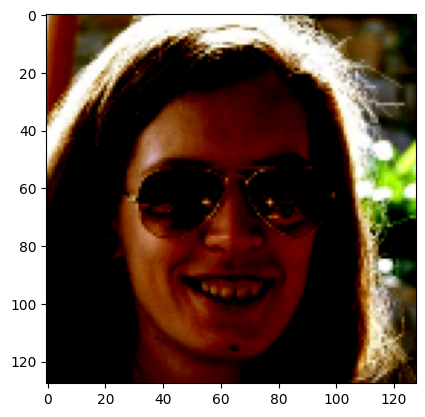

In [4]:
x = data_module.train_dataset[0][0]
# plot it 
from matplotlib import pyplot as plt
plt.imshow(x.transpose(1,2,0))
plt.show()

In [5]:
# print min, max, mean, std
import numpy as np
print(x.min())
print(x.max())
print(x.mean())
print(x.std())

-1.0
1.0
-0.106003135
0.5741423


In [12]:
import run_lib
import torch
import pandas as pd
import numpy as np
import pickle
import os
from lightning_modules.VAE import VAE
from dim_reduction import inspect_VAE
from configs.utils import fix_rds_path
from torch.utils.data import DataLoader
from lightning_data_modules.ImageDatasets import CelebAAnnotatedDataset
from configs.utils import fix_config
# load config
path = '/store/CIA/js2164/rds/gb511/projects/scoreVAE/experiments/gd_ffhq/only_encoder_ddpm_plus_smld_VAE_KLweight_0.01_DiffDecoders_continuous_prior/config.pkl'
with open(path, 'rb') as f:
  config = pickle.load(f)
config = fix_config(config)


# get config
# from configs.VAE.celebA import get_config
# config = get_config()
# get home dir
home = os.path.expanduser('~')
config.data.base_dir = f'{home}/rds_work/datasets/'
config.data.dataset = 'celebA-HQ-160'
config.data.attributes = ['Male']
config.data.normalization_mode = 'gd'
dataset = CelebAAnnotatedDataset(config, phase='val')
dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)
print(dataset.normalization_mode)
data_iter = iter(dataloader)
train_data = next(data_iter)
test_data = next(data_iter)

gd


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


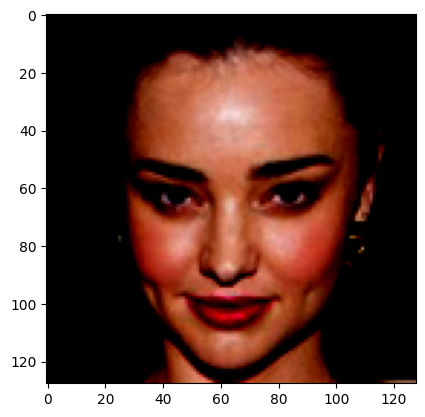

In [24]:
from matplotlib import pyplot as plt
x = train_data[0][6]
# plot it
plt.imshow(x.permute(1,2,0))
plt.show()

In [23]:
# print min, max, mean, std
import numpy as np
print(x.min())
print(x.max())
print(x.mean())
print(x.std())

tensor(-1.)
tensor(1.)
tensor(-0.4298)
tensor(0.6851)


In [33]:
x_ffhq = data_module.train_dataset[0]
x_celeba = train_data[0]

In [27]:
x_ffhq[0].shape

(3, 128, 128)

In [27]:
import random
q = range(10)
random.sample(q, 20)

ValueError: Sample larger than population or is negative